<h1 align="center">Convolutional Neural Networks - PyTorch</h1>


In Round 1 you have applied an artificial neural network to classify images. In this round, we discuss a particular class of ANN that is well suited for image data - convolutional neural networks (CNN). A CNN is a special case of ANN that contains several convolutional layers. Roughly speaking, convolutional layers are designed to learn to "detect" a specific pattern in an image. Such a pattern could be a simple geometric shape such as a circle or a higher-level concept like a tree.

## Goals

- The basic principles of convolutional layers
- The basic principles of a pooling layer
- Construct a CNN  by combining convolutional layers
- The "padding" and "stride" parameters in CNN
- Determine CNN parameters required for a given data set
- How to visualize the activations (outputs) of different neurons within a CNN

## Recommended

- Chapter 5 of "Deep Learning with Python" by F.Chollet. available via Aalto library [click here](https://primo.aalto.fi/discovery/search?query=any,contains,deep%20learning%20with%20python&tab=LibraryCatalog&search_scope=MyInstitution&sortby=date_d&vid=358AALTO_INST:VU1&facet=frbrgroupid,include,9062037433404512326&lang=en&offset=0)
- Chapter 14 of "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" by Aurélien Géron.[click here](https://primo.aalto.fi/discovery/search?query=any,contains,Hands-On%20Machine%20Learning%20with%20Scikit-Learn,%20Keras,%20and%20TensorFlow&tab=LibraryCatalog&search_scope=MyInstitution&vid=358AALTO_INST:VU1&lang=en&offset=0)
- Chapter 9 of "Deep Learning" by I.Goodfellow [click here](https://www.deeplearningbook.org)
- PyTorch CNN Tutorial [click here](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)
- PyTorch Documentation [click here](https://pytorch.org/docs/stable/index.html)

# Convolutional Neural Network (CNN) 

In the previous round, we used an ANN to predict the label indicating a category of fashion items based on an image. There, we have used an ANN constituted by [dense layers](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) with each neuron of the layer connected to each neuron in the preceding layer. 

Consider an ANN applied to images with a (rather low) resolution of $200 \times 200$ pixels. Let us assume that the hidden layer consisting of only $128$ neurons. We would then already obtain $200 \times 200 \times 128$ tunable weights for this single hidden layer. 

As a rule of thumb, it is good to have at least ten times more labeled data points than the number of features. Thus, for the ANN with a single dense layer, we would need around $$10 \times 200 \times 200 \times 128 = 51200000$$ fashion item images for which we know the true category. This significantly exceeds the number of training samples in the [fashion MNIST](https://pytorch.org/vision/stable/datasets.html#fashion-mnist) dataset.  

When developing a deep learning method, we often have different options for improving performance. One option is to collect more training data, i.e., manually label more images of fashion items. In this round, we focus on another alternative: reduce the number of tunable parameters (weights) in the ANN. 

It turned out that using dense layers for image-related problems is not efficient since ANN with densely connected layers does not preserve the structure or spatial information of the image. Convolutional neural networks (CNN), on the other hand, exploit this structure by using fewer connections between layers compared to dense layers. Generally, we can say that the neurons of the convolutional layer are learning to "detect" the presence of a specific visual pattern at a particular location on the image. Since these patterns only cover a small area (patch) of the original image, we need fewer connections between the neuron of a convolutional layer and a small set of neurons in the previous layer. This small set is called the **receptive field** of the neuron. We will discuss the architecture of the convolutional layer in more detail later in the notebook.

A CNN consists of a sequence of different kinds of layers. There are three main types of layers in CNN:
- Convolutional layer (conv)
- Pooling layer (pooling)
- Fully connected (or dense) Layer (FC)

A typical CNN architecture looks like this: 

<img src="https://miro.medium.com/max/2000/1*vkQ0hXDaQv57sALXAJquxA.jpeg" width=850>

<center><a href="https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53">image source</a></center>

First, let's see what the input and convolutional layers are in a CNN.

### Input Layer

In Round 1, we have "flattened" the image of a fashioned item. Flattening refers to the process of stacking the image pixel intensities into a one-dimensional feature vector. 

A very useful representation of image and video data is in the form of **tensors**. A tensor is a multidimensional array of numbers. In the case of two-dimensional space, tensors become **matrices**. For the one-dimensional space, tensors become **vectors**. In particular, we can represent a RGB colour image with $128 \times 128$ pixels by a three-dimensional tensor of shape $(128,128,3)$. 

See below an example input to CNN - an image matrix (volume) of a dimension 3x3x3. The values of the volume are pixel values from 0 to 255.

<img src="./R3/volume.png" width=400>

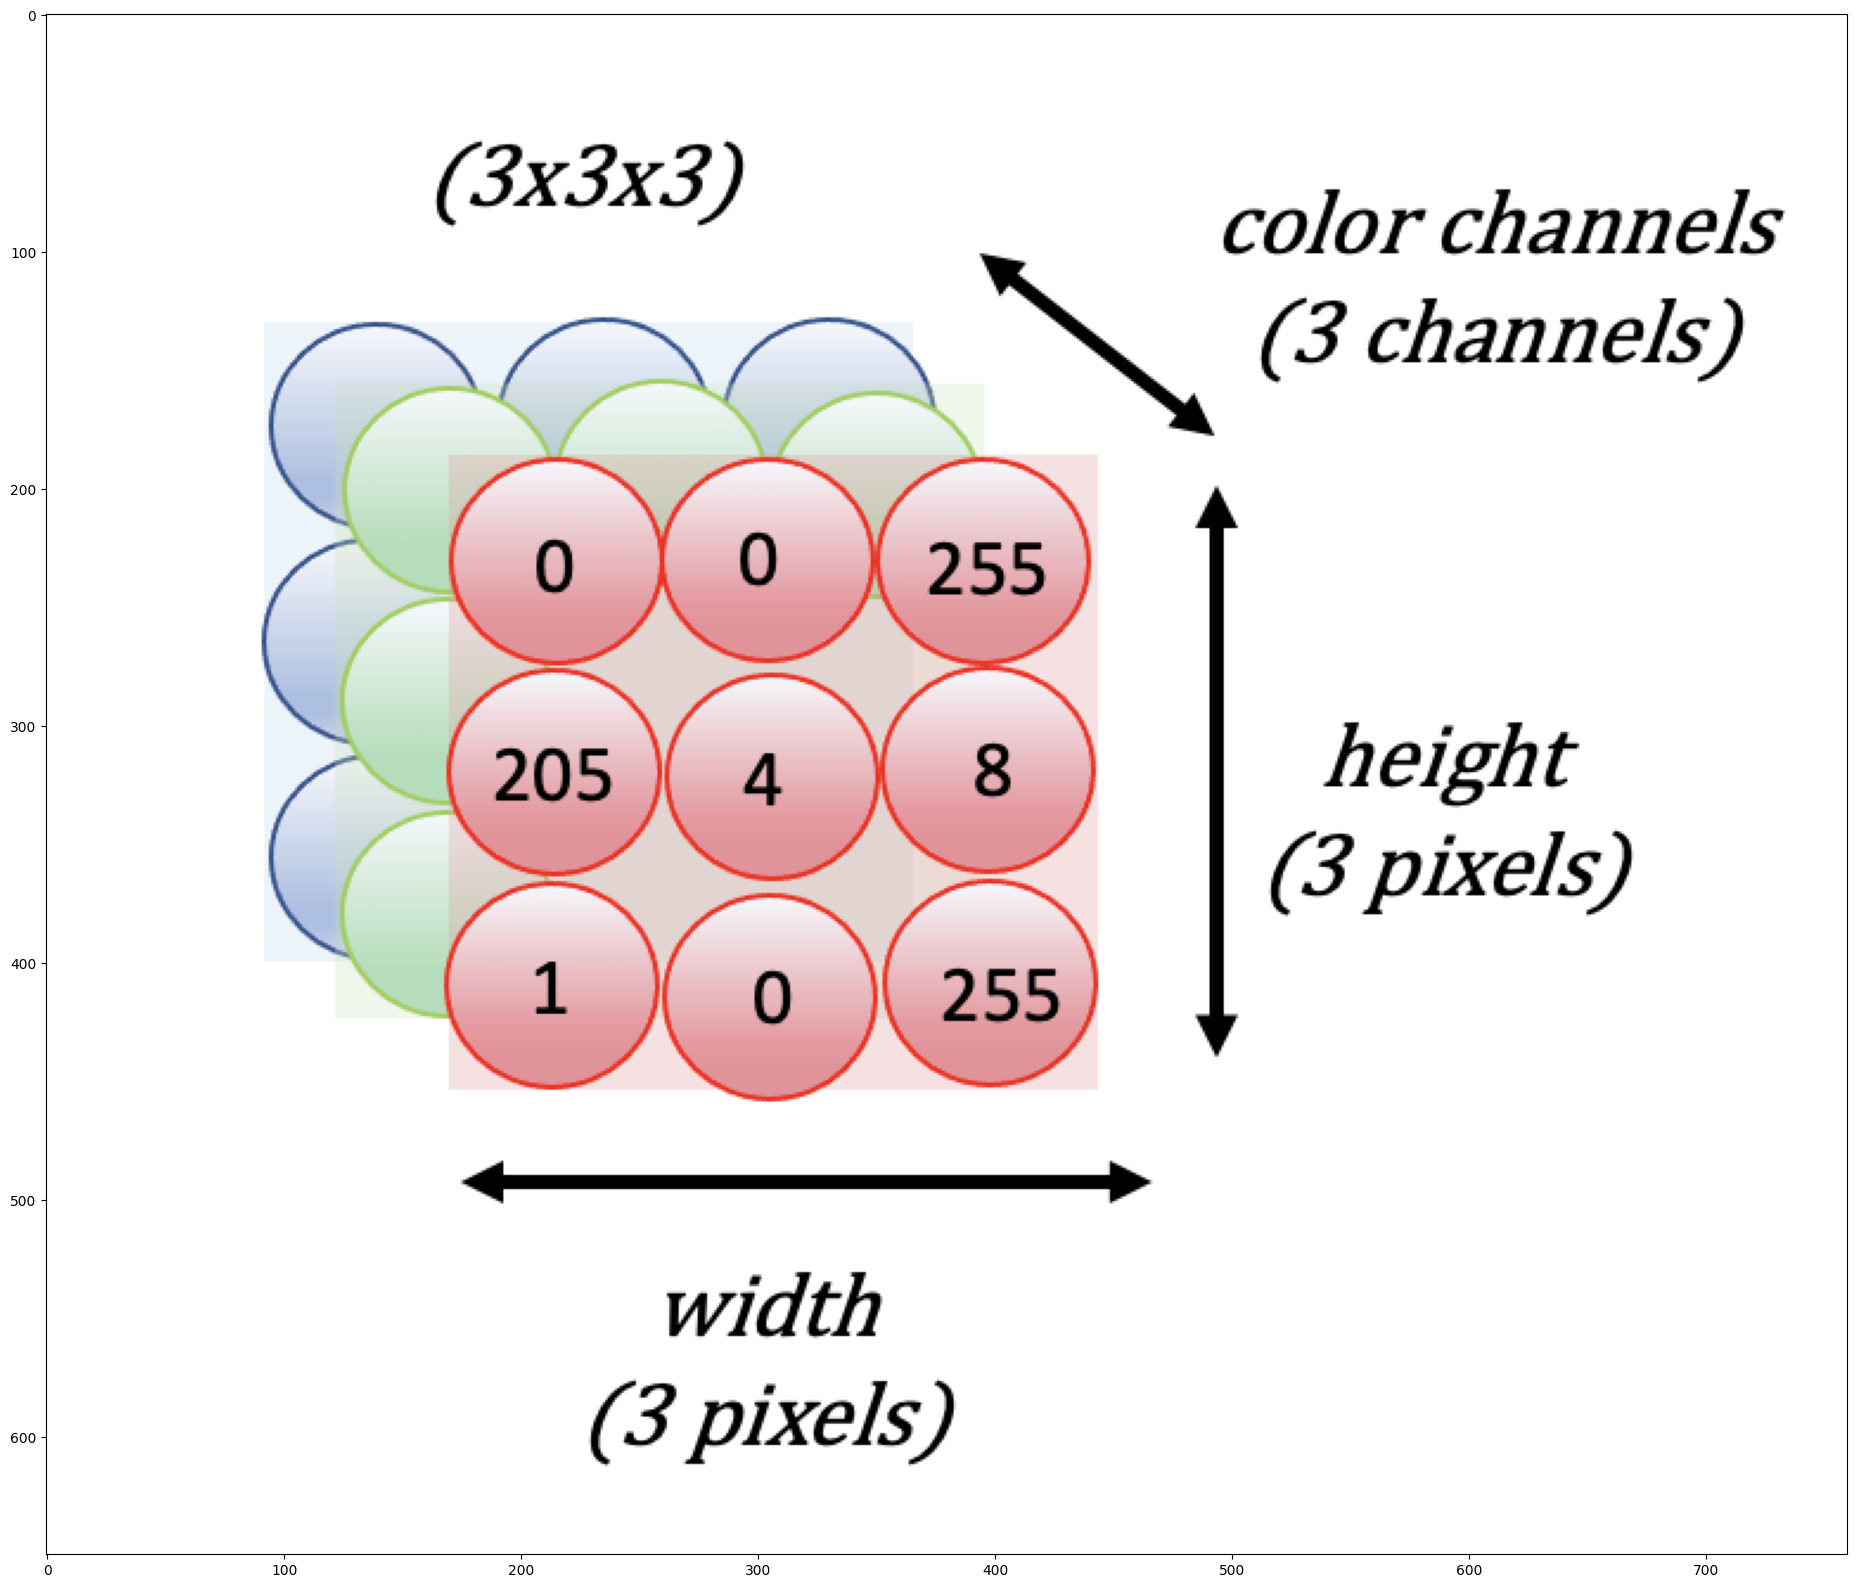

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('./R3/volume.png')
plt.rcParams['figure.figsize'] = [40, 20]
imgplot = plt.imshow(img)
plt.show()

### Convolutional Layer

The crucial building block of CNN is a convolutional layer. A convolutional layer performs convolution operation between the image and kernels (also called filters). Basically, the **kernel** is a set of weights. **Convolution** of the image is a process where the kernel is sliding across the image and computing the weighted sum of the small area (patch) of the image. The kernel is typically much smaller (few pixels only) compared to the original image. Convolution of the image with kernels is used in image processing for edge detection, blurring, sharpening effects, etc. In the article [Kernel (Wikipedia)](https://en.wikipedia.org/wiki/Kernel_(image_processing)), you can see the effect of different kernels over an image.

Consider a grayscale image of shape $3 \times 3 \times 1$ (height/weight/channels) and a kernel of size $2 \times 2 \times 1$. For each location in the original image, we compute the sum of the element-wise products between kernel (or kernel weights) and image pixel values:

`0*1 + -1*0 + 20*2 + 5*(-1) = 35`

<img src="./R3/c1.png" width=400>

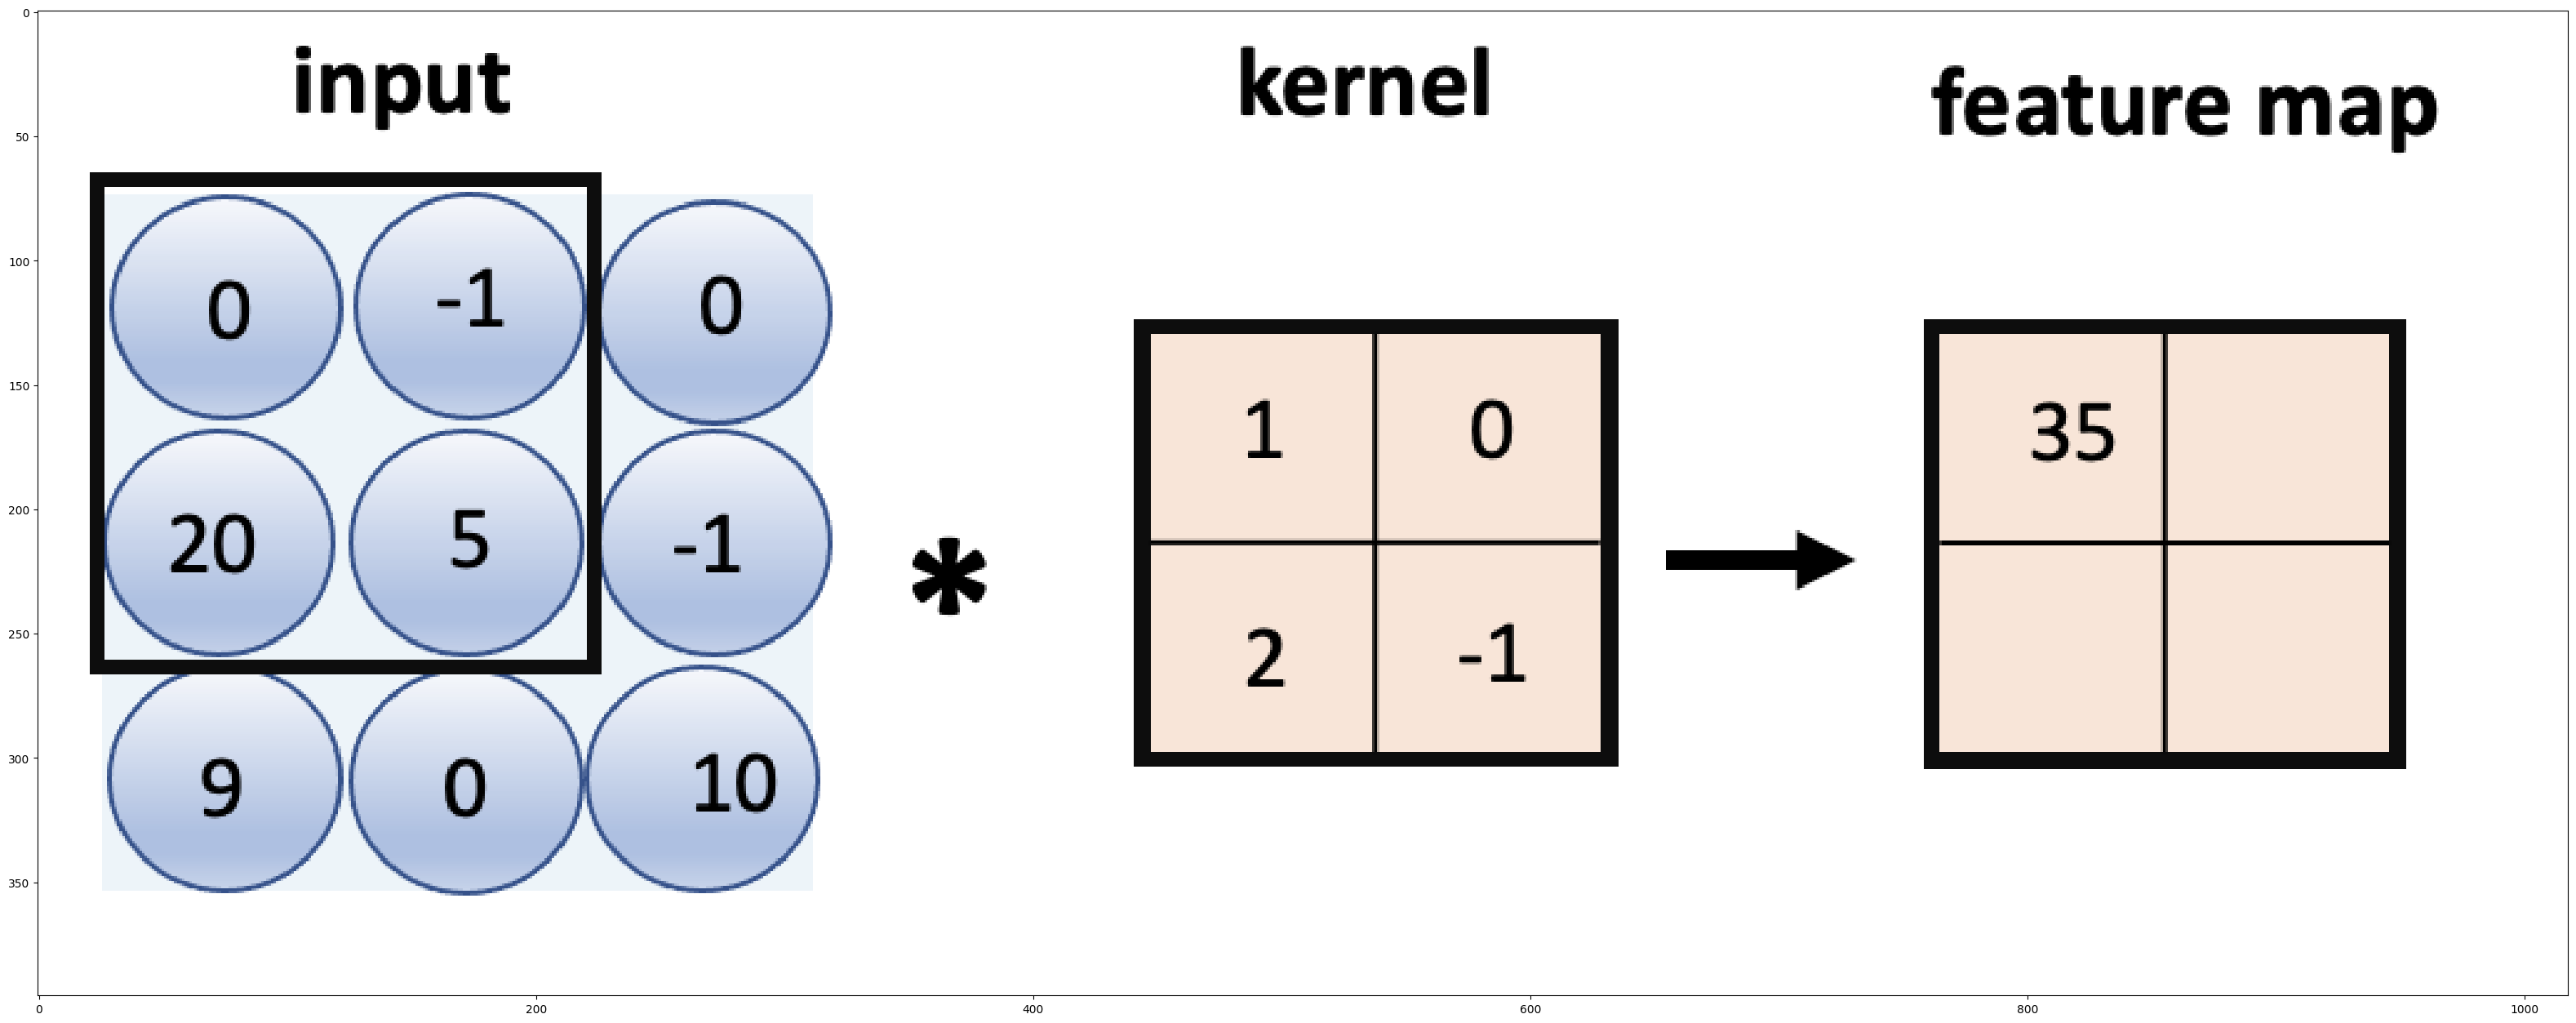

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('./R3/c1.png')
plt.rcParams['figure.figsize'] = [40, 20]
imgplot = plt.imshow(img)
plt.show()

Next, the kernel slides to right by 1 pixel and produces the new value of a feature map as shown below. 

<img src="./R3/c2.png" width=400>

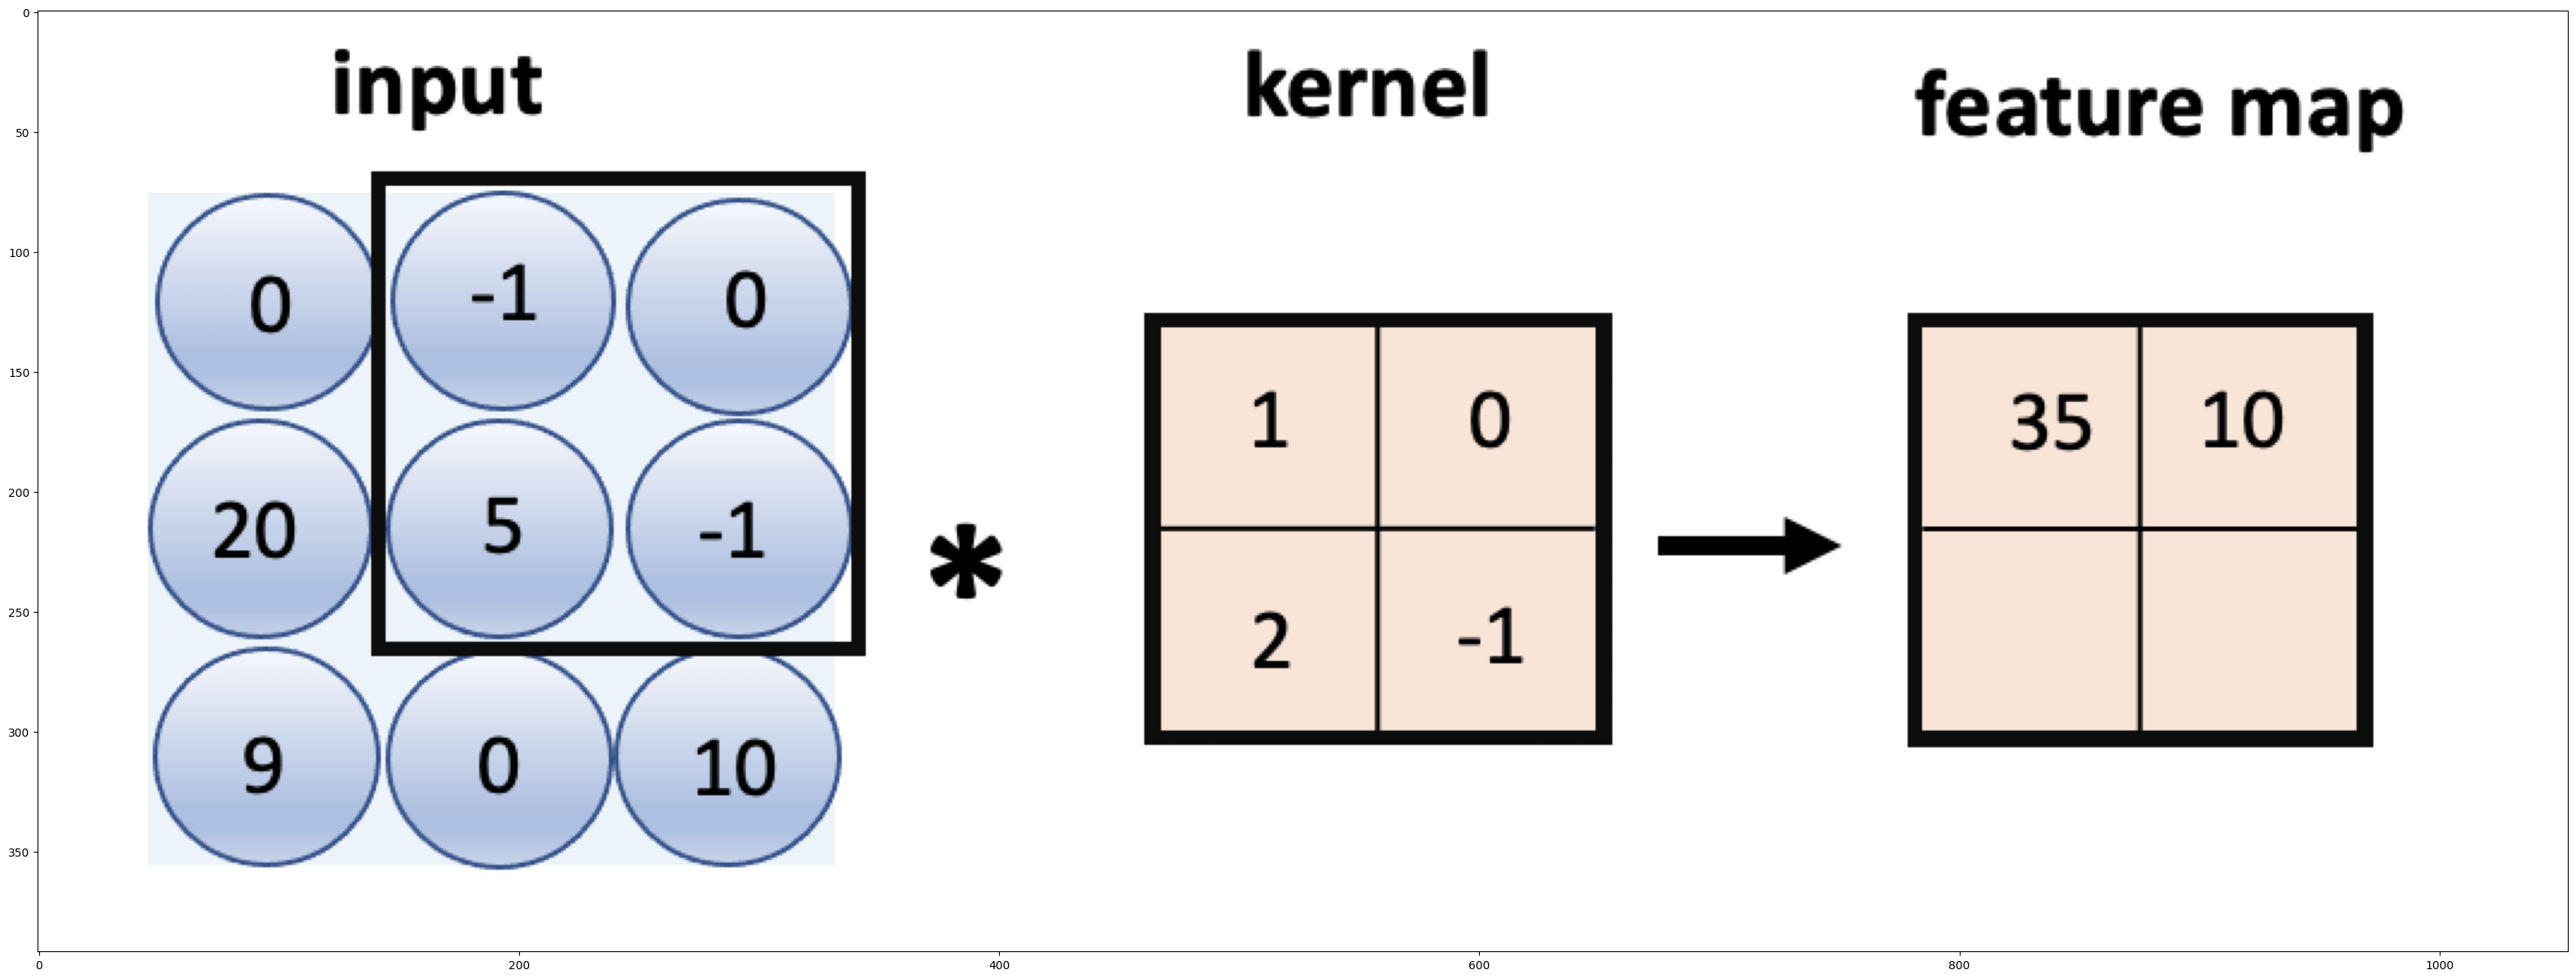

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('./R3/c2.png')
plt.rcParams['figure.figsize'] = [40, 20]
imgplot = plt.imshow(img)
plt.show()

Similarly, the kernel slides down by 1 pixel and produces the third value of a feature map, and so on until we slide through all the values of the input image.

<img src="./R3/c3.png" width=400>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('./R3/c3.png')
plt.rcParams['figure.figsize'] = [40, 20]
imgplot = plt.imshow(img)
plt.show()

Finally the feature map has been created as shown below: 

<img src="./R3/c4.png" width=400>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('./R3/c4.png')
plt.rcParams['figure.figsize'] = [40, 20]
imgplot = plt.imshow(img)
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
from scipy.signal import convolve2d
import pandas as pd
from sklearn.metrics import classification_report

In [ ]:
def padding(X, p):
    Z = np.pad(X, ((p,p),(p,p)), 'constant')
    return Z

def convolution(image, kernel, padding, strides):
    kernel = np.flipud(np.fliplr(kernel))
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    if padding != 0:
        imagePadded = np.pad(image, ((padding,padding),(padding,padding)),'constant')
    else:
        imagePadded = image

    for y in range(image.shape[1]):
        if y > image.shape[1] - yKernShape:
            break
        if y % strides == 0:
            for x in range(image.shape[0]):
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break
    return output

In [ ]:
input_matrix = np.array([[1, -1, 0], [2, 4, -1], [6, 0, 1]])
kernel = np.array([[1, 0], [0.5, -1]])
b = 0

def conv_step(matrix_slice, kernel, b):
    S = np.multiply(matrix_slice, kernel)
    Z = np.sum(S)
    Z = Z + b
    return Z

matrix_slice = input_matrix[0:2,0:2]
x1 = conv_step(matrix_slice, kernel, b)
print("x1=", x1)

matrix_slice = np.array(input_matrix[0:2,1:3])
x2 = conv_step(matrix_slice, kernel, b)
print("x2=", x2)

matrix_slice = np.array(input_matrix[1:3,0:2])
x3 = conv_step(matrix_slice, kernel, b)
print("x3=", x3)

matrix_slice = np.array(input_matrix[1:3,1:3])
x4 = conv_step(matrix_slice, kernel, b)
print("x4=", x4)

In the following example, we construct a CNN model using PyTorch. We will load the Fashion MNIST dataset, preprocess it, define our CNN architecture, train the model, and evaluate its performance.

First, let's load and preprocess the dataset:

In [ ]:
# Set random seeds for reproducibility
np.random.seed(1)
torch.manual_seed(1)

# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1] range
])

# Load Fashion-MNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, 
                                                 download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, 
                                                download=True, transform=transform)

# Get data as numpy arrays for compatibility with original code
X_trainval = train_dataset.data.numpy()
y_trainval = train_dataset.targets.numpy()
X_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()

print("X Train {} and X Test size {}".format(X_trainval.shape[0], X_test.shape[0]))

# Split trainval set into training and validation datasets
X_train = X_trainval[0:10000]
y_train = y_trainval[0:10000]
X_val = X_test[:6000]
y_val = y_test[:6000]

print('X_test.shape:', X_test.shape)
print('X_val.shape:', X_val.shape)
print('y_test.shape:', y_test.shape)
print('y_val.shape:', y_val.shape)

Now let's normalize and prepare the data for PyTorch:

In [ ]:
# Normalize and convert to PyTorch tensors
X_test = X_test / 255.0

# Convert to PyTorch tensors and add channel dimension
X_train = torch.FloatTensor(X_train).unsqueeze(1) / 255.0
X_val = torch.FloatTensor(X_val).unsqueeze(1) / 255.0
X_test = torch.FloatTensor(X_test).unsqueeze(1)
y_train = torch.LongTensor(y_train)
y_val = torch.LongTensor(y_val)
y_test = torch.LongTensor(y_test)

# Create datasets and data loaders
train_dataset_custom = TensorDataset(X_train, y_train)
val_dataset_custom = TensorDataset(X_val, y_val)
test_dataset_custom = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset_custom, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset_custom, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset_custom, batch_size=32, shuffle=False)

# Shape of train, validation and test datasets
print(f'Number of training examples: {X_train.shape}')
print(f'Number of validation examples: {X_val.shape}')
print(f'Number of test examples: {X_test.shape}')

## Define the CNN Model in PyTorch

Now let's define our CNN architecture using PyTorch. We'll use `torch.nn.Conv2d` for convolutional layers and `torch.nn.MaxPool2d` for pooling layers:

In [ ]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # First convolutional layer: 1 input channel, 16 output channels, 3x3 kernel, padding=1
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        # Second convolutional layer: 16 input channels, 16 output channels, 3x3 kernel, padding=1
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1)
        # Max pooling layer: 2x2 kernel, stride=1
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=1)
        # Flatten layer (handled in forward pass)
        # Dense layers
        self.fc1 = nn.Linear(16 * 27 * 27, 64)  # 16 channels * 27 * 27 (after pooling)
        self.fc2 = nn.Linear(64, 10)  # 10 classes for Fashion-MNIST
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, x):
        # First conv layer with ReLU activation
        x = F.relu(self.conv1(x))
        # Second conv layer with ReLU activation
        x = F.relu(self.conv2(x))
        # Max pooling
        x = self.maxpool(x)
        # Flatten
        x = x.view(x.size(0), -1)  # Equivalent to Flatten() in Keras
        # First dense layer with ReLU
        x = F.relu(self.fc1(x))
        # Dropout
        x = self.dropout(x)
        # Output layer (no softmax here, as it's handled by CrossEntropyLoss)
        x = self.fc2(x)
        return x

# Initialize model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNNModel().to(device)

# Print model summary
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Model has {count_parameters(model)} trainable parameters")
print(model)

## Train the Model

Now let's compile and train our model. In PyTorch, we use `nn.CrossEntropyLoss` (equivalent to sparse_categorical_crossentropy) and `optim.RMSprop` optimizer:

In [ ]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Equivalent to sparse_categorical_crossentropy
optimizer = optim.RMSprop(model.parameters(), lr=0.001)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            
            # Zero gradients
            optimizer.zero_grad()
            # Forward pass
            output = model(data)
            # Calculate loss
            loss = criterion(output, target)
            # Backward pass
            loss.backward()
            # Update weights
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            total_train += target.size(0)
            correct_train += (predicted == target).sum().item()
        
        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct_train / total_train
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        
        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                loss = criterion(output, target)
                val_loss += loss.item()
                _, predicted = torch.max(output.data, 1)
                total_val += target.size(0)
                correct_val += (predicted == target).sum().item()
        
        val_loss = val_loss / len(val_loader)
        val_acc = 100 * correct_val / total_val
        
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
    
    return train_losses, train_accuracies, val_losses, val_accuracies

In [ ]:
training = True

if training:
    # Train the model
    train_losses, train_accuracies, val_losses, val_accuracies = train_model(
        model, train_loader, val_loader, criterion, optimizer, num_epochs=20
    )
    
    # Save model
    torch.save(model.state_dict(), 'model_pytorch.pth')
    
    # Create history DataFrame for plotting
    history_df = pd.DataFrame({
        'loss': train_losses,
        'accuracy': [acc/100 for acc in train_accuracies],
        'val_loss': val_losses,
        'val_accuracy': [acc/100 for acc in val_accuracies]
    })
else:
    # Load model
    model = CNNModel().to(device)
    model.load_state_dict(torch.load('model_pytorch.pth'))

In [ ]:
if training:
    # Plot training history
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history_df['loss'], label='Training Loss')
    plt.plot(history_df['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(history_df['accuracy'], label='Training Accuracy')
    plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

## Feature Map Visualization

Let's create a feature extractor to visualize the feature maps from different layers:

In [ ]:
class FeatureExtractor(nn.Module):
    def __init__(self, model):
        super(FeatureExtractor, self).__init__()
        self.conv1 = model.conv1
        self.conv2 = model.conv2
        self.maxpool = model.maxpool
        
    def forward(self, x):
        features = []
        x = F.relu(self.conv1(x))
        features.append(x)  # First conv layer output
        x = F.relu(self.conv2(x))
        features.append(x)  # Second conv layer output
        x = self.maxpool(x)
        features.append(x)  # Maxpool layer output
        return features

# Create feature extractor
feature_extractor = FeatureExtractor(model)

# Visualize feature maps for the first test image
model.eval()
with torch.no_grad():
    # Get a test image
    test_image = X_test[0].unsqueeze(0).to(device)  # Add batch dimension
    
    # Show the original image
    plt.figure(figsize=(4, 4))
    plt.imshow(test_image.cpu().squeeze(), cmap='gray')
    plt.title('Test Image')
    plt.axis('off')
    plt.show()
    
    # Extract features
    features = feature_extractor(test_image)
    first_layer_activation = features[0]
    
    print(f"First layer activation shape: {first_layer_activation.shape}")
    
    # Visualize feature maps from first convolutional layer
    plt.figure(figsize=(16,16))
    
    num_filters = first_layer_activation.shape[1]
    for i in range(num_filters):
        plt.subplot(4, 4, i+1)
        plt.axis('off')
        plt.imshow(first_layer_activation[0, i].cpu().numpy(), cmap='gray')
        plt.title('Feature Map '+ str(i+1))
    
    plt.tight_layout()
    plt.show()

## Model Evaluation

Finally, let's evaluate our model on the test set:

In [ ]:
# Get predictions for the test data
model.eval()
predicted_classes = []
with torch.no_grad():
    for data, _ in test_loader:
        data = data.to(device)
        outputs = model(data)
        _, predicted = torch.max(outputs, 1)
        predicted_classes.extend(predicted.cpu().numpy())

predicted_classes = np.array(predicted_classes)

# Get true test labels
y_true = y_test.numpy()

# Calculate correct and incorrect predictions
correct = np.nonzero(predicted_classes == y_true)[0]
incorrect = np.nonzero(predicted_classes != y_true)[0]

print("Correct predicted classes:", correct.shape[0])
print("Incorrect predicted classes:", incorrect.shape[0])

# Class names for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

target_names = [f"Class {i} ({class_names[i]}) :" for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

In [ ]:
def plot_images(data_index):
    '''
        This is a function to plot first 9 images.
        data_index: indices of images.
    '''
    # plot the sample images
    f, ax = plt.subplots(3,3, figsize=(7,7))

    for i, indx in enumerate(data_index[:9]):
        ax[i//3, i%3].imshow(X_test[indx].squeeze(), cmap='gray')
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title("True:{}  Pred:{}".format(class_names[y_test[indx]],class_names[predicted_classes[indx]]), fontsize=8)
    plt.show()

# Display correctly classified images
plot_images(correct)

## Summary

In this notebook, we've successfully migrated from TensorFlow/Keras to PyTorch for building a Convolutional Neural Network. Key differences include:

### PyTorch vs TensorFlow/Keras Equivalents:

1. **Data Loading**: 
   - TensorFlow: `tf.keras.datasets.fashion_mnist.load_data()`
   - PyTorch: `torchvision.datasets.FashionMNIST()`

2. **Model Definition**:
   - TensorFlow/Keras: `keras.Sequential()` with layers
   - PyTorch: Custom class inheriting from `nn.Module`

3. **Layers**:
   - TensorFlow: `layers.Conv2D()` → PyTorch: `nn.Conv2d()`
   - TensorFlow: `layers.MaxPooling2D()` → PyTorch: `nn.MaxPool2d()`
   - TensorFlow: `layers.Dense()` → PyTorch: `nn.Linear()`
   - TensorFlow: `layers.Flatten()` → PyTorch: `x.view(x.size(0), -1)`

4. **Activation Functions**:
   - TensorFlow: Built into layers (`activation='relu'`)
   - PyTorch: Applied separately (`F.relu()`)

5. **Training**:
   - TensorFlow: `model.compile()` and `model.fit()`
   - PyTorch: Manual training loop with forward pass, loss calculation, backward pass, and optimizer step

6. **Data Loading**:
   - TensorFlow: Data passed directly to `model.fit()`
   - PyTorch: `DataLoader` for batch processing

7. **Loss and Optimizer**:
   - TensorFlow: `keras.losses.sparse_categorical_crossentropy`, `keras.optimizers.RMSprop()`
   - PyTorch: `nn.CrossEntropyLoss()`, `optim.RMSprop()`

The PyTorch implementation provides more explicit control over the training process and is closer to the mathematical operations happening under the hood.